In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
%matplotlib inline

In [5]:
df=pd.read_csv(r"C:\Users\Farouk\Desktop\Telco-Customer-Churn.csv")


"""  I'm checking if there is a missing values in my data 
             if test=0 then there is no missing data              """

test=df.isna().sum().sum()
print(test)


0


In [6]:
target_variable=df.Churn.value_counts()
print(target_variable)

No     5174
Yes    1869
Name: Churn, dtype: int64


In [7]:
columns=df.columns
binary_cols=[]
multiple_cols=[]


for col in columns : 
    """ here df[col].value_counts() will give me a table : 
    Male      3555
    Female    3488
    Name: gender, dtype: int64
    and with shape[0] will give us the number of the rows in this exempl the output is 2  
    """
    
    if df[col].value_counts().shape[0] == 2:
        print(df[col].value_counts())
        binary_cols.append(col)
    else : 
        multiple_cols.append(col)

print(binary_cols)
print(multiple_cols)

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
No     5174
Yes    1869
Name: Churn, dtype: int64
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
['customerID', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


<Axes: xlabel='PaperlessBilling', ylabel='count'>

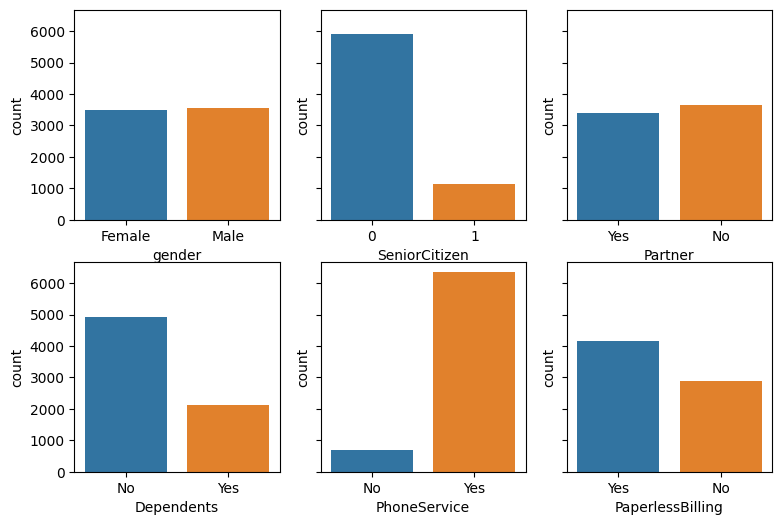

In [8]:
fig, axes= plt.subplots(2,3,figsize=(9,6),sharey=True)

sns.countplot(x="gender" , data=df, ax=axes[0, 0])
sns.countplot(x="SeniorCitizen" , data=df , ax=axes[0, 1])
sns.countplot(x="Partner" , data=df , ax=axes[0, 2])
sns.countplot(x="Dependents" , data=df , ax=axes[1, 0])
sns.countplot(x="PhoneService" , data=df , ax=axes[1, 1])
sns.countplot(x="PaperlessBilling" , data=df , ax=axes[1, 2])

In [9]:
"""It is better to check how the target variable (churn) changes according to the binary features.
To be able to make calculations, we need to change the values of target variable. “Yes” will be 1 and “No” will be 0."""

churn_numeric={'Yes' : 1 , 'No' : 0}
df.Churn.replace(churn_numeric , inplace = True) 
print(df.Churn)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [10]:
print(df[['gender','Churn']].groupby(['gender']).mean())

"""Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model."""

           Churn
gender          
Female  0.269209
Male    0.261603


'Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.'

In [11]:
print(df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean())
print(df[['Partner','Churn']].groupby(['Partner']).mean())
print(df[['Dependents','Churn']].groupby(['Dependents']).mean())
print(df[['PhoneService','Churn']].groupby(['PhoneService']).mean())
print(df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean())

                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
No       0.329580
Yes      0.196649
               Churn
Dependents          
No          0.312791
Yes         0.154502
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651


In [12]:
"""We can also use pandas pivot_table function to check the relationship between features and target variable."""

table = pd.pivot_table(df, values='Churn' , index =['gender'],columns=['SeniorCitizen'], aggfunc= np.mean)

print(table)


SeniorCitizen         0         1
gender                           
Female         0.239384  0.422535
Male           0.232808  0.411150


There are 6 variables that come with internet service which are StreamingTV, StreamingMovies, OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport. There variables come into play if customer has internet service.

                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050
                 MonthlyCharges
InternetService                
DSL                   58.102169
Fiber optic           91.500129
No                    21.079194


' As we can see Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.  '

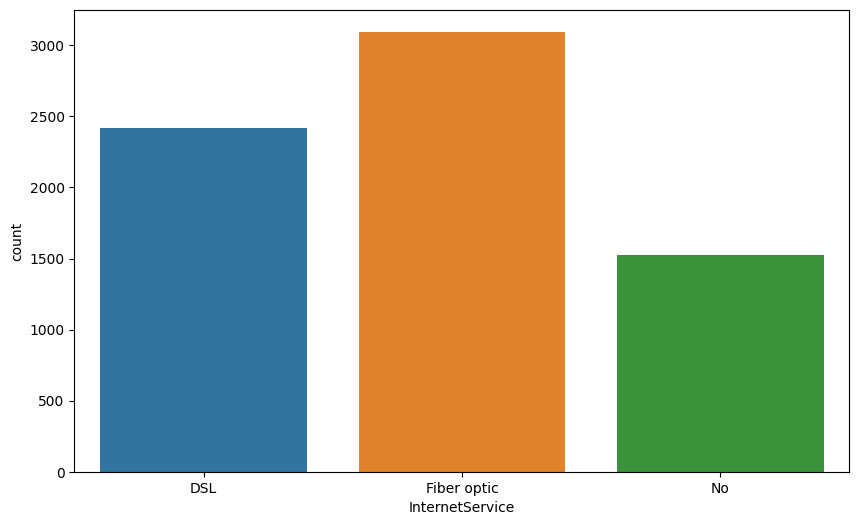

In [13]:

plt.figure(figsize=(10,6))
sns.countplot(x="InternetService", data=df) 
print(df[['InternetService','Churn']].groupby('InternetService').mean())


print(df[['InternetService','MonthlyCharges']].groupby('InternetService').mean())

""" As we can see Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.  """

                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663


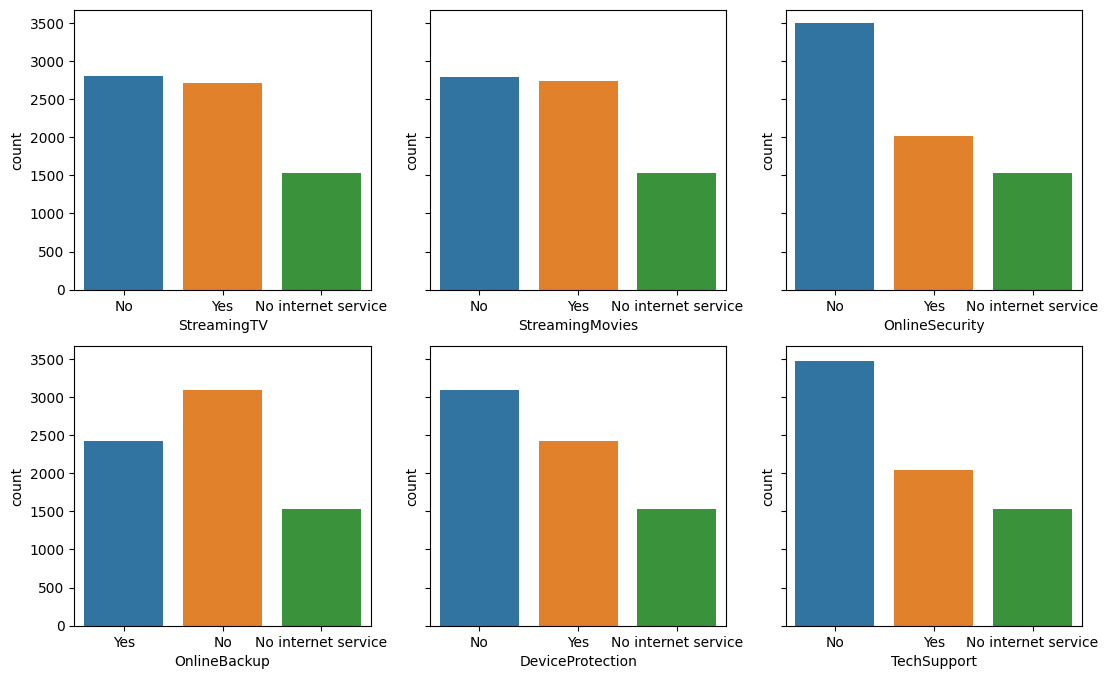

In [14]:
fig, axes = plt.subplots(2,3, figsize=(13,8),sharey = True)

sns.countplot(x="StreamingTV", data=df, ax=axes[0,0])
sns.countplot(x="StreamingMovies", data=df, ax=axes[0,1])
sns.countplot(x="OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot(x="OnlineBackup", data=df, ax=axes[1,0])
sns.countplot(x="DeviceProtection", data=df, ax=axes[1,1])
sns.countplot(x="TechSupport", data=df, ax=axes[1,2])

print(df[['StreamingTV','Churn']].groupby('StreamingTV').mean())
print(df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean())
print(df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean())
print(df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean())
print(df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean())
print(df[['TechSupport','Churn']].groupby('TechSupport').mean())

All internet service related features seem to have different churn rates for their classes because churn rate changes according to customers having these services.

In [15]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


I will include them in the model.

In [16]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

In [17]:
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


C:\Users\Farouk\AppData\Local\Temp\ipykernel_9492\4012098163.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["tenure"],ax=axes[0])
C:\Users\Farouk\AppData\Local\Temp\ipykernel_9492\4012098163.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MonthlyCharges"], ax=axes[1])


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

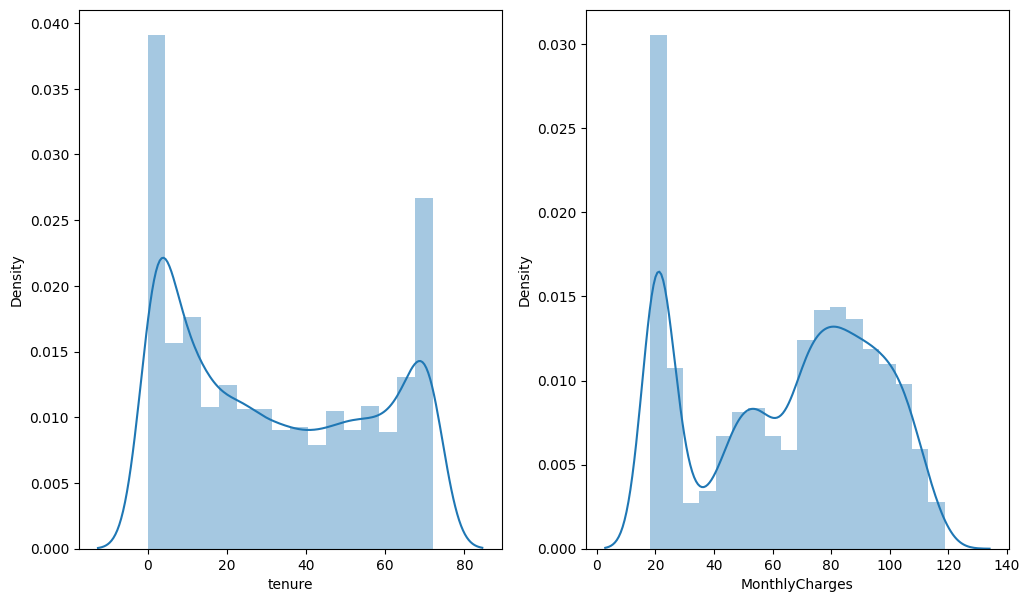

In [18]:
fig, axes = plt.subplots(1,2, figsize=(12,7))

sns.distplot(df["tenure"],ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

According to the distribution of tenure variable, most of the customers are either pretty new or have stayed for a long time with the company. Our goal should be finding a way to keep those customers with a tenure of up to a few months.

A similar trend is seen on MonthlyCharges. There seems to be a gap between low rates and high rates.

Let’s check how churn rate changes according to tenure and MonthlyCharges:

In [19]:
df[["tenure",'MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [20]:
df[["Contract",'tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


As expected, contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model:

Customer ID,
Gender,
PhoneService,
Contract,
TotalCharges=(tenure and monthlycharges)

# Data Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

### Encoding categorical variables:

In [22]:
cat_features=['SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

X= pd.get_dummies(df,columns=cat_features,drop_first=True)

X=X.drop("customerID",axis=1)
X=X.drop('gender',axis=1)
X=X.drop('PhoneService',axis=1)
X=X.drop('TotalCharges',axis=1)
X=X.drop('Contract',axis=1)

print(X)


      tenure  MonthlyCharges  Churn  SeniorCitizen_1  Partner_Yes  \
0          1           29.85      0                0            1   
1         34           56.95      0                0            0   
2          2           53.85      1                0            0   
3         45           42.30      0                0            0   
4          2           70.70      1                0            0   
...      ...             ...    ...              ...          ...   
7038      24           84.80      0                0            1   
7039      72          103.20      0                0            1   
7040      11           29.60      0                0            1   
7041       4           74.40      1                1            1   
7042      66          105.65      0                0            0   

      Dependents_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
0                  0                               1                  0   
1                  0 

In [23]:
sc=MinMaxScaler()
a=sc.fit_transform(df[['tenure']])
b=sc.fit_transform(df[['MonthlyCharges']])

X['tenure'] = a
X['MonthlyCharges'] = b



target variables with imbalanced class distribution is not desired for machine learning models. I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

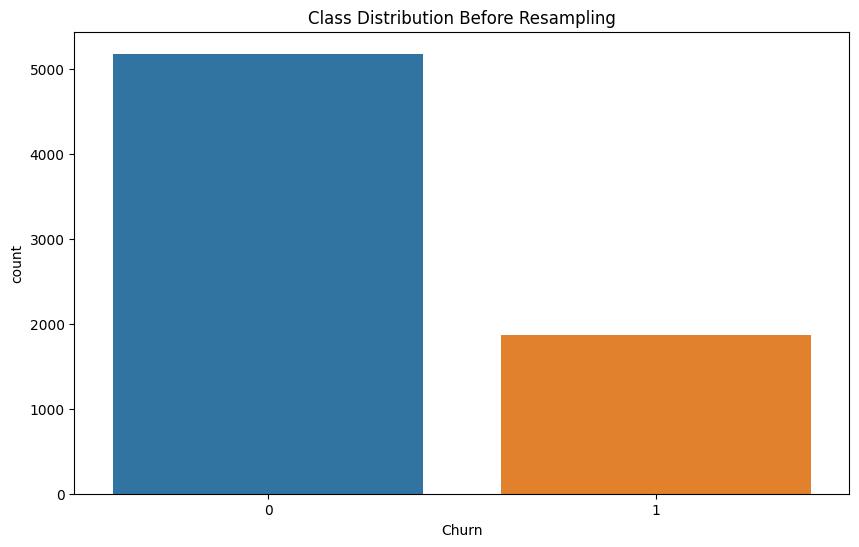

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='Churn',data=df).set_title('Class Distribution Before Resampling')

Separating positive class (churn=yes) and negative class (churn=no):

In [25]:
"""we have No     5174
           Yes    1869    """

X_no=X[X.Churn==0]
X_yes=X[X.Churn==1]

Upsampling the positive class:

In [26]:
X_yes_upsampled=X_yes.sample(n=len(X_no),replace=True,random_state=42)


Combining positive and negative class and checking class distribution:

C:\Users\Farouk\AppData\Local\Temp\ipykernel_9492\3396558640.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)


Text(0.5, 1.0, 'Class Distribution after Resampling')

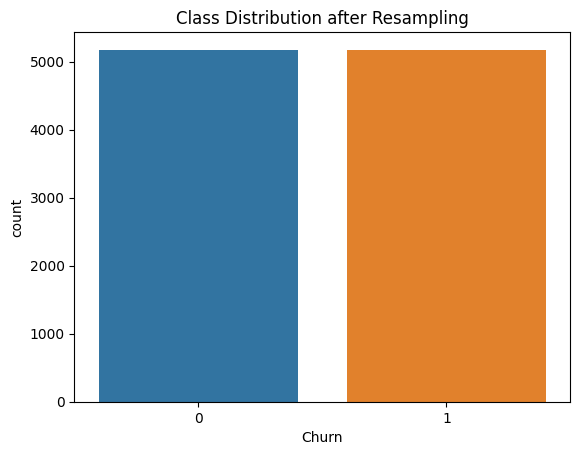

In [27]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

sns.countplot(x='Churn',data=X_upsampled).set_title('Class Distribution after Resampling')

# Model Creation and Evaluation

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=X_upsampled.drop(['Churn'], axis=1)
Y=X_upsampled['Churn']


In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

print(x_train)

x_train.to_csv(r'C:\Users\Farouk\Desktop\x_train.csv')

y_train.to_csv(r'C:\Users\Farouk\Desktop\y_train.csv')

         tenure  MonthlyCharges  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
4541   0.013889        0.011443                0            0               0   
5709   0.250000        0.668657                1            0               0   
7393   0.069444        0.325871                0            0               0   
10026  0.486111        0.517910                0            1               0   
3578   0.097222        0.506468                0            0               0   
...         ...             ...              ...          ...             ...   
5734   0.430556        0.812935                1            0               0   
5191   0.166667        0.707960                0            0               0   
5390   0.083333        0.796020                1            0               0   
860    0.930556        0.538308                0            0               0   
7270   0.055556        0.613433                0            0               0   

       MultipleLines_No pho

#  Ridge Classifier

In [31]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [32]:
clf_ridge = RidgeClassifier()
clf_ridge.fit(x_train, y_train)

RidgeClassifier()

In [33]:
pred=clf_ridge.predict(x_train)

accuracy_score(y_train,pred)

0.7574293307562213

In [34]:
pred_test=clf_ridge.predict(x_test)

accuracy_score(y_test,pred_test)

0.7608695652173914

The model achieved 75% accuracy on training set and 76% accuracy on test set. The model is not overfitting because accuracies on training and test sets are pretty close.

However, 75% accuracy is not very good so we will try to get a better accuracy using a different model.

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(x_train,y_train)

"""n_estimators: The number of trees in the forest.
   max_depth: The maximum depth of the tree."""

'n_estimators: The number of trees in the forest.\n   max_depth: The maximum depth of the tree.'

In [37]:
pred = clf_forest.predict(x_train)
accuracy_score(y_train, pred)


0.8856003865668036

In [38]:
pred_test = clf_forest.predict(x_test)
accuracy_score(y_test, pred_test)

0.8458937198067633

# Improving the Model


GridSearchCV provides an easy way for parameter tuning. We can do cross-validation and try different parameters using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters ={'n_estimators':[150,200,250,300],'max_depth':[15,20,25]}

forest=RandomForestClassifier()
clf=GridSearchCV(estimator=forest , param_grid=parameters, n_jobs=-1 , cv=5)

"""cv = 5 means having a 5-fold cross validation. 
So dataset is divided into 5 subset. At each iteration, 
4 subsets are used in training and the other subset is used as test set.
When 5 iteration completed,
the model used all samples as both training and test samples."""

"""n_jobs parameter is used to select how many processors to use.
-1 means using all processors."""


'n_jobs parameter is used to select how many processors to use.\n-1 means using all processors.'

In [41]:
clf.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [42]:
print(clf.best_params_)

clf.best_score_

{'max_depth': 25, 'n_estimators': 250}


0.9007542209240151

In [43]:
clf_forest = RandomForestClassifier(n_estimators=300, max_depth=25)
clf_forest.fit(x_train,y_train)


RandomForestClassifier(max_depth=25, n_estimators=300)

In [44]:
pred = clf_forest.predict(x_train)
accuracy_score(y_train, pred)


0.996859144720947

In [45]:
pred_test = clf_forest.predict(x_test)
accuracy_score(y_test, pred_test)

0.9077294685990338